In [194]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [75]:
data=pd.read_csv("churnData.csv")

In [137]:
df=pd.DataFrame(data)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [138]:
df = df.drop("customerID",axis = 1)
df = df.drop("gender",axis = 1)

In [139]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [140]:
le = LabelEncoder()
for i in range(17):
    df.iloc[:,i+1]=le.fit_transform(data.iloc[:,i+1])

In [141]:
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,No
1,0,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,No
2,0,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,Yes
3,0,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,No
4,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,No
7039,0,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,No
7040,0,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,No
7041,1,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,Yes


In [148]:
x=df.iloc[:,0:17]
df["Churn"]=le.fit_transform(df["Churn"])
y = df["Churn"]

In [149]:
x

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1
1,0,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0
2,0,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1
3,0,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0
4,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1
7039,0,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1
7040,0,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1
7041,1,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1


In [150]:
model = SVC(probability = True)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2,random_state=9)
model.fit(Xtrain,Ytrain)

/home/harsh/anaconda3/envs/RILintern/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [162]:
model.predict(Xtest)

1409

In [195]:
confusion_matrix(Ytest,model.predict(Xtest))

array([[953,  91],
       [216, 149]])

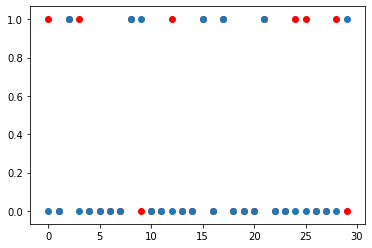

In [181]:
gtest = Ytest.iloc[0:30]
gxtest = Xtest.iloc[0:30]
g = []
for i in range(30):
    g.append(i)
plt.scatter(g,gtest, color= "red")
plt.scatter(g,model.predict(gxtest))

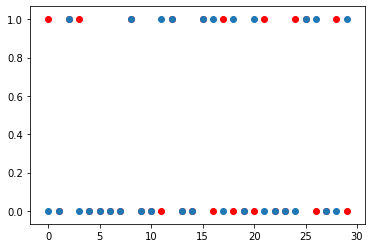

In [189]:
dtc=DecisionTreeClassifier()
dtc.fit(Xtrain,Ytrain)
gtest = Ytest.iloc[0:30]
gxtest = Xtest.iloc[0:30]
plt.scatter(g,gtest, color= "red")
plt.scatter(g,dtc.predict(gxtest))

/home/harsh/anaconda3/envs/RILintern/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


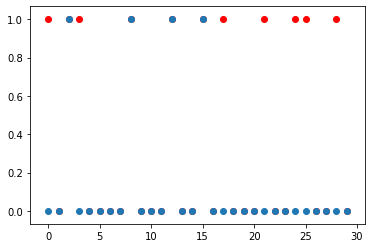

In [192]:
rfc=RandomForestClassifier(n_jobs=-1)
rfc.fit(Xtrain,Ytrain)
gtest = Ytest.iloc[0:30]
gxtest = Xtest.iloc[0:30]
plt.scatter(g,gtest, color= "red")
plt.scatter(g,rfc.predict(gxtest))